In [1]:
# install required packages. 
# %pip install numpy pandas matplotlib seaborn sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Vector Norms

### L1 Norm
The L1 norm is often referred to as the Manhattan/Taxicab Distance, the Least Absolute Shrinkage and Selection Operator (__LASSO__).

$ \| \mathbf{x} \|_{1} = \sum \limits _{i = 1} ^{N} \left\lvert x \right\rvert = \left\lvert x_{0} \right\rvert + \left\lvert x_{1} \right\rvert + . . . + \left\lvert x_{n} \right\rvert $


### L2 Norm
The L2 norm is often referred to as the Euclidean Distance, or the __Ridge__ Operator.


$ \| \mathbf{x} \|_{2} = \biggl(\sum \limits _{i = 1} ^{N} \left\lvert x \right\rvert^2\biggr)^\frac{1}{2} = \sqrt {x_{0}^2 + x_{1}^2 + . . . + x_{n}^2} $

In [3]:
'''
    L1, L2 Norms for a vector V, could be easily calculated
    using numpy as follows:
        from numpy.linalg import norm
        norm(V, ord=1) # for L1 norm (LASSO).
        norm(V, ord=2) # for L2 norm (Ridge).
'''

def l1_norm(V):
    return np.abs(V).sum()

def l2_norm(V):
    return np.sqrt( (V**2).sum() )

In [4]:
# Test
from numpy.linalg import norm

V = np.array([[1], [-3], [4]])
print(norm(V, ord=1))
print(l1_norm(V))

print(norm(V, ord=2))
print(l2_norm(V))

8.0
8
5.099019513592785
5.0990195135927845


## Linear Regression:

### Hypothesis:  &emsp;&emsp;    $ h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1} + . . . + \theta_{n} x_{n} $
### Parameters:  &emsp;&emsp;    $ \theta_{0} , \theta_{1}, . . . , \theta_{n}  $
### Cost Function:  &emsp;&emsp; $ J(\theta_{0} , \theta_{1}, . . . , \theta_{n}) = \frac{1}{2m} \sum \limits _{i = 0} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$  
### Goal:  &emsp;&emsp;&emsp;&emsp;    __Minimize__  $ J(\theta_{0} , \theta_{1}, . . . , \theta_{n}) $
### Method: &emsp;&emsp;&emsp;  Repeat { <br/> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ \theta_{j} := \theta_{j} - \alpha   \frac{\partial }{\partial x} J(\theta_{0}, . . . , \theta_{n}) $ <br/> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; , where $ \frac {\partial}{\partial x} J = \frac {1}{m} \sum \limits _{i = 0} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x^{(i)} $ <br/><br/> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;}&emsp;&emsp;&emsp;&emsp;(simultaneously update for every j = 0, . . ., n) 

In [231]:
def linear_regression(X, y, alpha=0.001, max_iters=1000, tol=0.001):
    '''
    arguments:
        x -- is the features matrix, has shape (m x n).
        y -- is the label vector, has shape (m x 1).
        , where m is the number of samples (rows).
        
        alpha -- is the learning rate.
        max_iters -- is the maximum number of iterations for the algorithm.
        tol -- is the tolerence in the cost difference, at which, conversion is considered occured.
        
    returns:
        A tuple of (theta, J, h): 
            theta -- the weights vector.
            J -- the cost function values vector.
            h -- hypothesis matrix.
    '''
    
    m, n = X.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), X]
    # print('x =', x)
    # print('y =', y)
    
    J_history = []
    # h_history = []
    theta_history = []
    
    for i in range(max_iters):
        # print('\ni =', i)
        
        h = x @ theta  # shape = (m x 1)
        # print(h)
        
        err = h - y  # shape = (m x 1)
        J = (0.5 / m) * (err.T @ err)  # scaler (1, 1)
        # print('J =', J)
        
        gd = (x.T @ err) / m  # shape = (n+1 x 1)
        # print('gd =', gd)
        theta = theta - alpha * gd  # shape = (n+1 x 1)
        
        # the condition i > 0 to assert that J_history and theta_history are not empty.
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol or np.abs(gd).max() <= tol):
                break
            
        J_history.append(J[0,0])
        # h_history.append(h)
        theta_history.append(theta)
            
    return theta_history, J_history

## Features Scaling:
- Make sure features are on similar scale.
- For gradient-based algorithms, features scaling improves the convergence speed.
- Distance-based algorithms like KNN, K-means, and SVM are most affected by the range of features. 
- Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features.

<br/>

### Min-Max Normalization (Normalization):
- It scales each feature in range [0, 1].
- This method preserves the shape of the original distribution.
- __Sensitive to outliers__.

- Method: &emsp;&emsp; $ x' = \frac{x - min(x)}{max(x) - min(x)} $

- ```python
from sklearn.preprocessing import MinMaxScaler
```

<br/>

### Mean Normalization (standardization):
- It produces a distribution centered at 0 (__mean__ = 0) with a __std__ of 1.
- This method makes a feature normally distributed.
- With outliers, the data will be scaled to a small interval.

- Method: &emsp;&emsp; $ x' = \frac{x - \bar x}{\sigma} $
- ```python
from sklearn.preprocessing import StandardScaler
```


<br/>

### Robust Scaling
- All distributions have most of their densities around 0 and a shape that is more or less the same.
- The Interquartile range makes this method __robust to outliers__ (hence the name).

- Method &emsp;&emsp; $ x' = \frac{x - Q_{1}(x)}{Q_{3}(x) - Q_{1}(x)} $
- ```python
from sklearn.preprocessing import RobustScaler
```


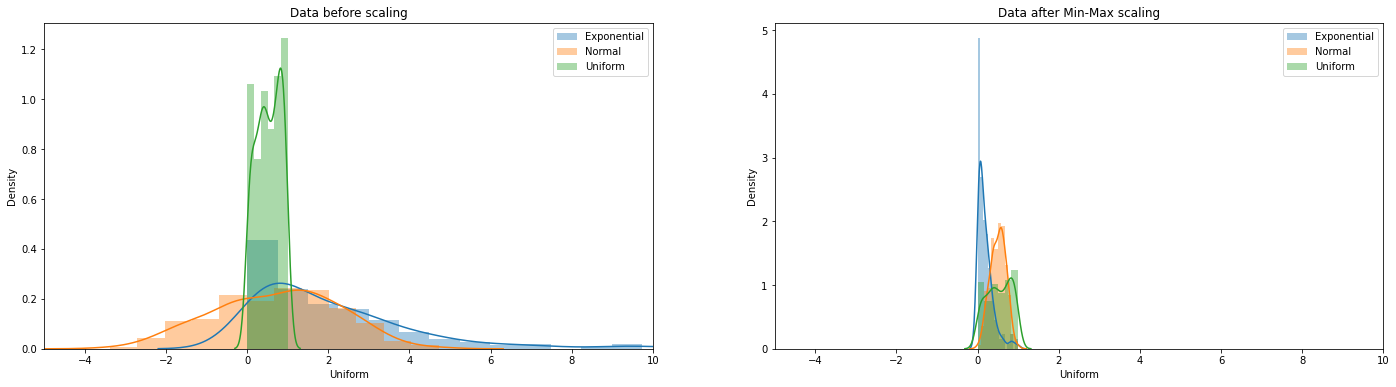

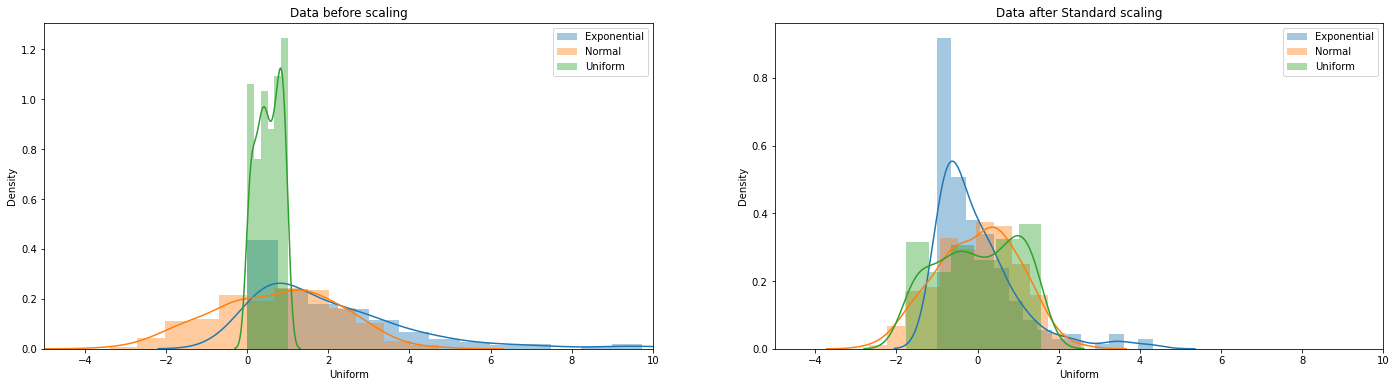

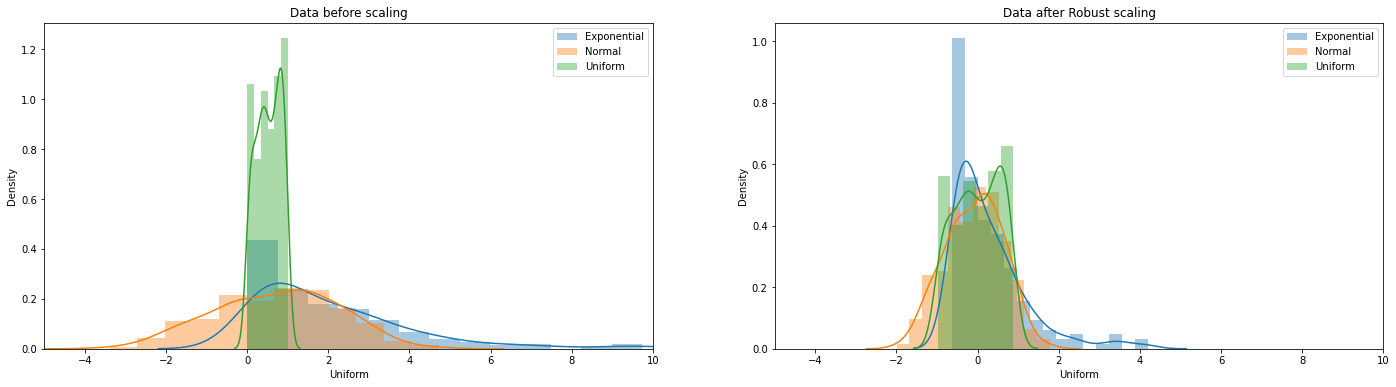

In [6]:
# showcase
from numpy.random import exponential, normal, uniform
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


data = pd.DataFrame({
     'Exponential': exponential(scale=2, size=200),
     'Normal': normal(loc=0.5, scale=1.5, size=200),
     'Uniform': uniform(low=0, high=1, size=200),
    })


def plot_dist(data, scaled_data, scaling_method):
    fig, axs = plt.subplots(1, 2, figsize=(24, 6))
    
    axs[0].set_title('Data before scaling')
    axs[0].set(xlim=(-5, 10))
    for col in data.columns:
        sns.distplot(data[col], ax=axs[0], label=col)
    axs[0].legend()
    
    axs[1].set_title(f'Data after {scaling_method} scaling')
    axs[1].set(xlim=(-5, 10))
    for col in scaled_data.columns:
        sns.distplot(scaled_data[col], ax=axs[1], label=col)
    axs[1].legend()
    
    plt.show()

    
def get_scaled_df(df, scaler):
    return pd.DataFrame(
        data=scaler.fit_transform(df.values),
        columns=df.columns,
        index=df.index,
    )
    
    
mm_scaled_data = get_scaled_df(data, MinMaxScaler())
plot_dist(data,  mm_scaled_data , scaling_method="Min-Max")

std_scaled_data = get_scaled_df(data, StandardScaler())
plot_dist(data, std_scaled_data, scaling_method="Standard")

robust_scaled_data = get_scaled_df(data, RobustScaler())
plot_dist(data, robust_scaled_data, scaling_method="Robust")


## Batch Dradient Descent:

### The main advantages:
- We can use __fixed learning rate__ during training without worrying about learning rate
    decay.
- It is __guaranteed to converge__ in theory to the __global minimum__ if the loss function is __convex__ \
    and to a __local minimum__ if the loss function is __not convex__.
- It has __unbiased__ estimate of gradients. The more the examples, the lower the standard
    error.

### The main disadvantages:
- It __may be slow__ to go over all examples especially when we have large datasets.
- Each step of learning happens after going over all examples where some examples may
    be __redundant__ and don’t contribute much to the update.
- For large datasets, the vectorization of data doesn’t fit into __memory__.
- For non-convex surfaces, it may only find the __local minimums__.    

In [232]:
from sklearn.metrics import r2_score

''' Some utility functions '''

def split_x_y(data):
    '''' Splits and returns the given data matrix into features matrix, and the last column as a label '''
    return data[:, :-1], data[:, -1].reshape(-1, 1)
            
    
def shuffle_split_data(_data, random_state=42):
    ''' Shuffles a copy of the given data, then returns it as features matrix and label vector '''
    data = _data.copy()
    
    np.random.seed(random_state)
    np.random.shuffle(data)
    
    return split_x_y(data)


def plot_results(x, y, result):
    '''
        result is a tuple of (theta_history, J_history)
    '''
    theta = result[0]
    J = result[1]
    
    f = np.c_[np.ones(shape=(x.shape[0], 1)), x]
    best_h = f @ theta[-1]
    
    print('r2_score =', r2_score(y, best_h))
    
    if x.shape[1] == 1 :
        # plot prediction vs actual values.
        plt.title('prediction vs actual values')
        plt.scatter(x, y)
        for t in theta:
            h = f @ t
            plt.plot(x, h, color='red', alpha=0.25)
        plt.plot(x, best_h, color='blue')    
        plt.show()
        
    # plot Thetas vs cost
    plt.title('Theta vs Cost')
    for i in range(theta[0].shape[0]):
        plt.plot([t[i, 0] for t in theta], J, label=f'Theta{i}')
    plt.xlabel('Theta')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()
    
    # plot cost vs #iterations
    plt.title('Cost vs #epochs')
    plt.plot(J)
    plt.xlabel('#epochs')
    plt.ylabel('Cost')
    plt.show()
    

## Stochastic GD (SGD):
__Stochastic gradient descent__ updates the parameters for each observation which leads to more number of updates.

$ \theta := \theta - \alpha \nabla_{\theta}J(\theta, x^{(i)}, y^{(i)}) $ \
$ J(\theta_{0}, \theta_{1}) = (h_{\theta}(x^{(i)}) - y^{(i)})^2 $

### Advantages of SGD:
- Due to its noisier gradient, it has a better chance to overcome local minima to a region that hopefully is more optimal. 

### Disadvantages of SGD:
- Frequent fluctuations lead to overshooting near to the desired exact minima.
- Adds noise to the learning process i.e. the variance becomes large as it uses 1 example for each step.
- Vectorization can't be applied over 1 example.

### Implementation:


In [238]:
# It's a good practice to shuffle data before operating on it.

def stochastic_gd(features, label, alpha=0.01, tol=0.001, max_iters=1000):    
    m, n = features.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), features]
    
    J_history = []
    theta_history = []
    
    for i in range(max_iters):
        for j in range(m):
            h = x[j] @ theta
            
            err = h - y[j]
            J = 0.5 * err**2
            
            gd = x[j] * err[0]    
            # Update thetas.
            theta = theta - alpha * gd.reshape(-1, 1)
            
            
        if i > 0 and (abs(J[0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol or np.abs(gd).max() <= tol):
            break

        theta_history.append(theta)
        J_history.append(J[0])

    return theta_history, J_history

t = [[0.46761153]
 [0.86515074]]
0.7702204305203262
r2_score = 0.7702204305203262


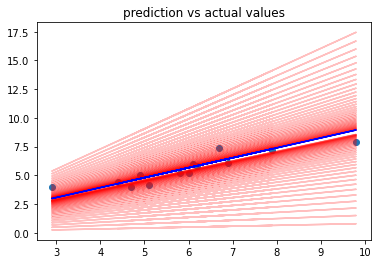

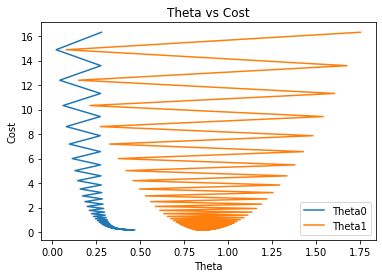

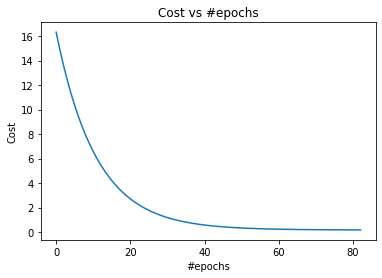

In [239]:
# data = np.genfromtxt('MultipleLR.csv', delimiter=',')
data = np.genfromtxt('RegData.csv', delimiter=',')
x, y = shuffle_split_data(data)
# x = np.linspace(0, 20)
# y = 

# print(x.shape)
# print(y.shape)

result = linear_regression(x, y, alpha=0.05, max_iters=1000)
t = result[0][-1]
print('t =', t)
h = np.c_[np.ones(shape=(x.shape[0], 1)), x] @ t

print(r2_score(y, h))


# y_pred = result[2]
# y_pred = y_pred.reshape(y.shape[0], len(result[2]))

# for i in range(10): # y_pred.shape[1]):
#     plt.plot(x, y_pred[i])
#     plt.show()
# print(np.c_[h, y])
plot_results(x, y, result)

## Mini-Batch GD:
Mini-Batch GD sums over lower number of examples each group of them is called a __batch__ \
Therefor, The learning happens on each batch of __b__ examples.

$ \theta := \theta - \alpha \nabla_{\theta}J(\theta, x^{(i:i+b)}, y^{(i:i+b)}) $ \
$ J(\theta_{0}, \theta_{1}) = \frac{1}{2b} \sum \limits _{j=i} ^{i+b} (h_{\theta}(x^{(j)}) - y^{(j)})^2 $

### Advantages of Mini-batch GD:
- Updates are __less noisy__ compared to SGD, which leads to __better convergenve__.
- Good for __large datasets__, as a higher number of updates in a single epoch compared to GD, so __less__ number \
    of epochs are required.
- Fits very well to the processor __memory__ which makes the computing faster.    

### Implementation Notes:
- Choose the batch size a __power of 2__ such as: 32, 64, 128, 256, ... .
- __Shuffle__ the data before operating on it.

### Implementation:


In [240]:
def get_mini_batches(data, batch_size):
    b = batch_size
    n, r = divmod(data.shape[0], b)
    mini_batches = [data[i*b : (i+1)*b] for i in range(n)]
    
    return mini_batches if r == 0 else mini_batches + [data[-1:-(r+1):-1]]


def mini_batch_gd(features, label, alpha=0.001, max_iters=1000, tol=0.001, batch_size=128):
    b = batch_size
    m, n = features.shape
    
    data = np.c_[np.ones(shape=(m, 1)), features, label]
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    J_history = []
    theta_history = []
    
    mini_batches = get_mini_batches(data, batch_size=batch_size)
    for i in range(max_iters):
        for j in range(len(mini_batches)):
            batch = mini_batches[j]
            x, y = split_x_y(data=batch)
            h = x @ theta
            err = h - y
            J = (0.5 / b) * (err.T @ err)
            gd = x.T @ err
            theta = theta - alpha * gd
            
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol or np.abs(gd).max() <= tol):
            i_till_convergence = i + 1 
            break

        J_history.append(J[0, 0])
        theta_history.append(theta)
            
    return theta_history, J_history

In [175]:
# b = 64
# arr = np.arange(2000).reshape(-1, 4)
# batches = get_mini_batches(arr, batch_size=b)

# print(len(batches))

# for i in range(len(batches)):
#     print(batches[i].shape)

r2_score = 0.7698186160906186


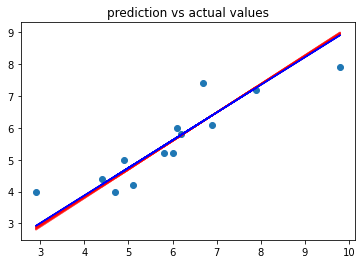

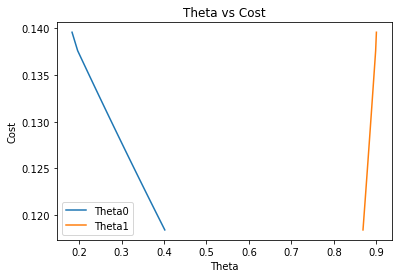

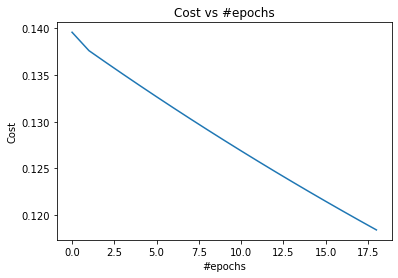

In [241]:
sgd_result = stochastic_gd(x, y)
# sgd_result[0][0], sgd_result[1][0], sgd_result[2][0] 
plot_results(x, y, sgd_result)

r2_score = 0.7474092893402773


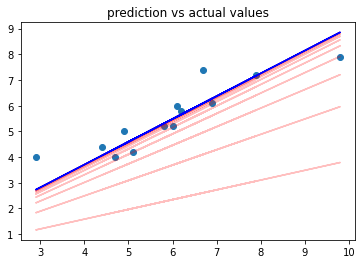

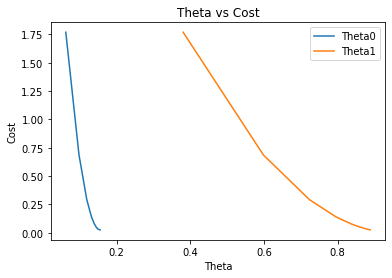

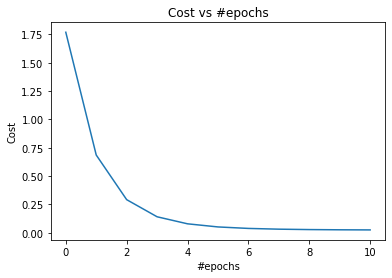

In [242]:
mbgd_result = mini_batch_gd(x, y, batch_size=4)
plot_results(x, y, mbgd_result)

In [243]:
def momentum_gd(X, y, gamma=0.9, alpha=0.01, max_iters=1000):
    m, n = X.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # initialize the momentum vector as a ones vector.
    mt = np.ones(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), X]
    # print('x =', x)
    # print('y =', y)
    
    J_history = []
    theta_history = []
    
    for i in range(max_iters):
        h = x @ theta  # shape = (m x 1)
        
        err = h - y  # shape = (m x 1)
        J = (0.5 / m) * (err.T @ err)  # scaler (1, 1)
        
        gd = (x.T @ err) / m  # shape = (n+1 x 1)
        mt = gamma * mt + alpha * gd
        
        theta = theta - mt  # shape = (n+1 x 1)
        
        # check conversion.        
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol or np.abs(gd).max() <= tol):
                break
            
        J_history.append(J[0,0])
        theta_history.append(theta)
            
    return theta_history, J_history

In [257]:
def nag_gd(X, y, gamma=0.9, alpha=0.01, max_iters=1000):
    m, n = X.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # initialize the momentum vector as a ones vector.
    v = np.ones(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), X]
    # print('x =', x)
    # print('y =', y)
    
    J_history = []
    theta_history = []
    
    for i in range(max_iters):
        theta_tmp = theta - gamma * mt        
        
        h_tmp = x @ theta_tmp  # shape = (m x 1)
        err_tmp = h_tmp - y  # shape = (m x 1)
        
        gd_theta_tmp = (x.T @ err_tmp) / m  # shape = (n+1 x 1)
        
        theta = theta_tmp - alpha * gd_theta_tmp  # shape = (n+1 x 1)
        
        v = gamma * v + alpha * gd_theta_tmp
        
        # calculate cost of theta
        h = x @ theta
        err = h - y
        J = (0.5 / m) * (err.T @ err)  # scaler (1, 1)
        
        # check conversion.        
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol or np.abs(gd).max() <= tol):
                break
            
        J_history.append(J[0,0])
        theta_history.append(theta)
            
    return theta_history, J_history

In [258]:
def adagrad_gd(X, y, alpha=0.01, epselon=1e-8, max_iters=1000, tol=0.001):
    
    m, n = X.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # initialize the momentum vector as a ones vector.
    v = np.ones(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), X]
    # print('x =', x)
    # print('y =', y)
    
    J_history = []
    theta_history = []
    
    for i in range(max_iters):
        h = x @ theta  # shape = (m x 1)
        
        err = h - y  # shape = (m x 1)
        J = (0.5 / m) * (err.T @ err)  # scaler (1, 1)
        
        gd = (x.T @ err) / m  # shape = (n+1 x 1)
        
        v = v + gd**2
        
        theta = theta - alpha * gd / (np.sqrt(v) + epselon)  # shape = (n+1 x 1)
        
        # check conversion.        
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol or np.abs(gd).max() <= tol):
                break
            
        J_history.append(J[0,0])
        theta_history.append(theta)
            
    return theta_history, J_history

r2_score = 0.7916077308959957


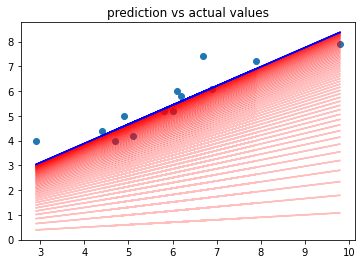

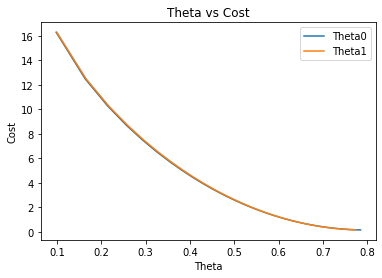

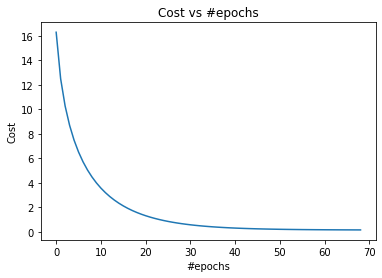

In [259]:
adagrad_res = adagrad_gd(x, y, alpha=0.1)
plot_results(x, y, adagrad_res)

In [285]:
def rms_gd(X, y, alpha=0.01, beta=0.9, epselon=1e-8, max_iters=1000, tol=0.001):
    
    m, n = X.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # initialize the momentum vector as a ones vector.
    v = np.ones(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), X]
    # print('x =', x)
    # print('y =', y)
    
    J_history = []
    theta_history = []
    
    for i in range(max_iters):
        h = x @ theta  # shape = (m x 1)
        
        err = h - y  # shape = (m x 1)
        J = (0.5 / m) * (err.T @ err)  # scaler (1, 1)
        
        gd = (x.T @ err) / m  # shape = (n+1 x 1)
        
        v = beta * v + (1 - beta) * gd**2
        
        theta = theta - alpha * gd / (np.sqrt(v) + epselon)  # shape = (n+1 x 1)
        
        # check conversion.        
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol or np.abs(theta - theta_history[-1]).max() <= tol) or np.abs(gd).max() <= tol):
                break
            
        J_history.append(J[0,0])
        theta_history.append(theta)
            
    return theta_history, J_history

r2_score = 0.8001248731331064


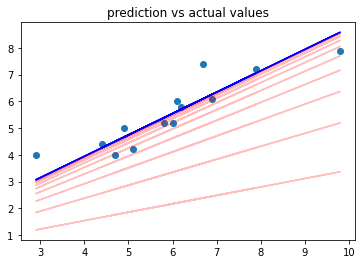

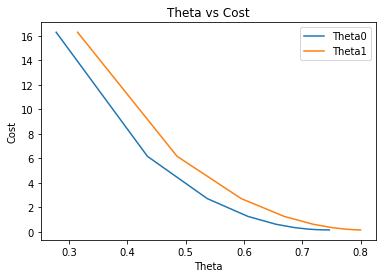

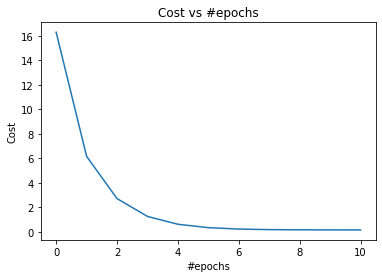

In [261]:
rms_res = rms_gd(x, y, alpha=0.1)
plot_results(x, y, rms_res)

In [288]:
def adam_gd(X, y, beta_1=0.9, beta_2=0.999, alpha=0.01, epselon=1e-8, max_iters=1000, tol=0.001):
    
    m, n = X.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # initialize the momentum vector as a ones vector.
    mt = np.ones(shape=(n+1, 1))
    v = np.zeros(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), X]
    
    J_history = []
    theta_history = []
    
    for i in range(max_iters):
        # print(i)
        h = x @ theta  # shape = (m x 1)
        
        err = h - y  # shape = (m x 1)
        J = (0.5 / m) * (err.T @ err)  # scaler (1, 1)
        
        gd = (x.T @ err) / m  # shape = (n+1 x 1)
        
        # Adam
        mt = beta_1 * mt + (1 - beta_1) * gd
        v = beta_2 * v + (1 - beta_2) * gd**2
        
        # Bias Correction
        mt_corrected = mt / (1 - beta_1**(i+1))
        v_corrected = v / (1 - beta_2**(i+1))
        
        theta = theta - alpha * mt_corrected / (np.sqrt(v_corrected) + epselon)  # shape = (n+1 x 1)
        
        # check conversion.        
        if i > 0 and (abs(J[0,0] - J_history[-1]) <= tol): # or np.abs(theta - theta_history[-1]).max() <= tol): # or np.abs(gd).max() <= tol):
                print(i)
                break
            
        J_history.append(J[0,0])
        theta_history.append(theta)
            
    return theta_history, J_history

46
r2_score = 0.7970385099542441


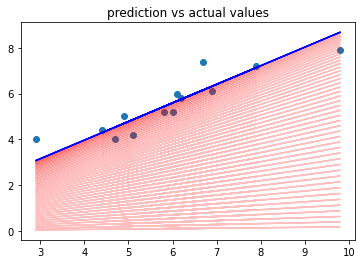

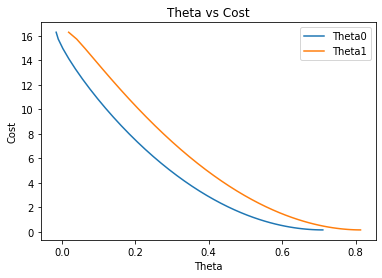

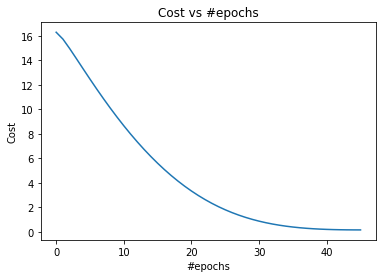

In [292]:
adam_res = adam_gd(x, y, alpha=0.025)
plot_results(x, y, adam_res)